# A. INTRODUCTION:

## Background information about the dataset:

Datasource - Kaggle:

- [Google Play Store Apps](https://www.kaggle.com/gauthamp10/google-playstore-apps): 645.13 MB - 24 columns - 2,312,944 rows
- [Google Play Store User Review](https://www.kaggle.com/lava18/google-play-store-apps): 7.31 MB - 5 columns -  64,296 rows

According to the author, the data was collected with the help of Python and Scrapy running on a cloud vm instance on June 2021.


## The Audiences:

Main audiences:

- Developer Companies/Individuals
- Tech Start-ups
- Investors

These audiences will be interested in data about number of installs or rating of the apps, which help them:

- Make more money from selling apps
- Sell more ads inside apps
- Get more data from user which can benefit other fields of business

## Big Question: How an App/Game can be successful in Google Play Store?

Google Data Studio Report:

[Google Play Store - Games](https://datastudio.google.com/reporting/493edb21-4c31-47ae-a0d2-639635e76a36)

# B. CLEANING DATASET

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
pd.options.display.float_format = "{:,.2f}".format

df1 = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/0. CoderSchool/4. Google_Appstore_project/googleplaystore.csv')
df_ur = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/0. CoderSchool/4. Google_Appstore_project/googleplaystore_user_reviews.csv')
df2 = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/0. CoderSchool/4. Google_Appstore_project/Google_Playstore_Full.csv')  

Mounted at /content/gdrive


In [ ]:
df2.head()

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,Currency,Size,Minimum Android,Developer Id,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time
0,Gakondo,com.ishakwe.gakondo,Adventure,0.00,0.00,10+,10.00,15,True,0.00,USD,10M,7.1 and up,Jean Confident Irénée NIYIZIBYOSE,https://beniyizibyose.tk/#/,jean21101999@gmail.com,"Feb 26, 2020","Feb 26, 2020",Everyone,https://beniyizibyose.tk/projects/,False,False,False,2021-06-15 20:19:35
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.40,64.00,"5,000+","5,000.00",7662,True,0.00,USD,2.9M,5.0 and up,Webserveis,https://webserveis.netlify.app/,webserveis@gmail.com,"May 21, 2020","May 06, 2021",Everyone,https://dev4phones.wordpress.com/licencia-de-uso/,True,False,False,2021-06-15 20:19:35
2,Vibook,com.doantiepvien.crm,Productivity,0.00,0.00,50+,50.00,58,True,0.00,USD,3.7M,4.0.3 and up,Cabin Crew,NaN,vnacrewit@gmail.com,"Aug 9, 2019","Aug 19, 2019",Everyone,https://www.vietnamairlines.com/vn/en/terms-an...,False,False,False,2021-06-15 20:19:35
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.00,5.00,10+,10.00,19,True,0.00,USD,1.8M,4.0.3 and up,Climate Smart Tech2,http://www.climatesmarttech.com/,climatesmarttech2@gmail.com,"Sep 10, 2018","Oct 13, 2018",Everyone,NaN,True,False,False,2021-06-15 20:19:35
4,GROW.me,com.horodyski.grower,Tools,0.00,0.00,100+,100.00,478,True,0.00,USD,6.2M,4.1 and up,Rafal Milek-Horodyski,http://www.horodyski.com.pl,rmilekhorodyski@gmail.com,"Feb 21, 2020","Nov 12, 2018",Everyone,http://www.horodyski.com.pl,False,False,False,2021-06-15 20:19:35


## 1. Remove Unwanted Data

In [ ]:
# Remove unwanted columns
df2.drop(columns=['Installs', 'Minimum Installs','Minimum Android','Developer Website','Developer Email', 'Privacy Policy'], inplace=True)
df2.head()

,App Name,App Id,Category,Rating,Rating Count,Maximum Installs,Free,Price,Currency,Size,Developer Id,Released,Last Updated,Content Rating,Ad Supported,In App Purchases,Editors Choice,Scraped Time
0,Gakondo,com.ishakwe.gakondo,Adventure,0.00,0.00,15,True,0.00,USD,10M,Jean Confident Irénée NIYIZIBYOSE,"Feb 26, 2020","Feb 26, 2020",Everyone,False,False,False,2021-06-15 20:19:35
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.40,64.00,7662,True,0.00,USD,2.9M,Webserveis,"May 21, 2020","May 06, 2021",Everyone,True,False,False,2021-06-15 20:19:35
2,Vibook,com.doantiepvien.crm,Productivity,0.00,0.00,58,True,0.00,USD,3.7M,Cabin Crew,"Aug 9, 2019","Aug 19, 2019",Everyone,False,False,False,2021-06-15 20:19:35
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.00,5.00,19,True,0.00,USD,1.8M,Climate Smart Tech2,"Sep 10, 2018","Oct 13, 2018",Everyone,True,False,False,2021-06-15 20:19:35
4,GROW.me,com.horodyski.grower,Tools,0.00,0.00,478,True,0.00,USD,6.2M,Rafal Milek-Horodyski,"Feb 21, 2020","Nov 12, 2018",Everyone,False,False,False,2021-06-15 20:19:35


In [ ]:
#Rename columns:
df2 = df2.rename(columns={"Maximum Installs": "Install"})
df2.head()

,App Name,App Id,Category,Rating,Rating Count,Install,Free,Price,Currency,Size,Developer Id,Released,Last Updated,Content Rating,Ad Supported,In App Purchases,Editors Choice,Scraped Time
0,Gakondo,com.ishakwe.gakondo,Adventure,0.00,0.00,15,True,0.00,USD,10M,Jean Confident Irénée NIYIZIBYOSE,"Feb 26, 2020","Feb 26, 2020",Everyone,False,False,False,2021-06-15 20:19:35
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.40,64.00,7662,True,0.00,USD,2.9M,Webserveis,"May 21, 2020","May 06, 2021",Everyone,True,False,False,2021-06-15 20:19:35
2,Vibook,com.doantiepvien.crm,Productivity,0.00,0.00,58,True,0.00,USD,3.7M,Cabin Crew,"Aug 9, 2019","Aug 19, 2019",Everyone,False,False,False,2021-06-15 20:19:35
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.00,5.00,19,True,0.00,USD,1.8M,Climate Smart Tech2,"Sep 10, 2018","Oct 13, 2018",Everyone,True,False,False,2021-06-15 20:19:35
4,GROW.me,com.horodyski.grower,Tools,0.00,0.00,478,True,0.00,USD,6.2M,Rafal Milek-Horodyski,"Feb 21, 2020","Nov 12, 2018",Everyone,False,False,False,2021-06-15 20:19:35


## 2. Check/Change Data Type

In [ ]:
df3 = df2.copy()

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2312944 entries, 0 to 2312943
Data columns (total 17 columns):
 #   Column            Dtype  
---  ------            -----  
 0   App Name          object 
 1   App Id            object 
 2   Category          object 
 3   Rating            float64
 4   Rating Count      float64
 5   Install           int64  
 6   Free              bool   
 7   Price             float64
 8   Currency          object 
 9   Size              object 
 10  Developer Id      object 
 11  Released          object 
 12  Last Updated      object 
 13  Content Rating    object 
 14  Ad Supported      bool   
 15  In App Purchases  bool   
 16  Editors Choice    bool   
dtypes: bool(4), float64(3), int64(1), object(9)
memory usage: 238.2+ MB


### a. Change column 'Size' datatype to float and sync Size unit

In [ ]:
# Split Size number and Size Unit (M,k,G, Varies with device) separately into column Size and SizeUnit
df3[['Size','SizeUnit']] = df3['Size'].str.extract(r"(?P<Size>\d*[\.\,]?\d*)(?P<SizeUnit>\D*)", expand=False)

In [ ]:
# Clear comma inside numbers (eg. 1,024 -> 1024)
df3['Size'] = df3['Size'].str.replace(',', '')

In [ ]:
# Change Size column to float, any error, empty string (from Varies with device) -> NaN
df3['Size'] = pd.to_numeric(df3['Size'], errors='coerce')

In [ ]:
# Convert all Size to Megabyte
def mb_converter(row):
  if row['SizeUnit'] == 'k':
    return row['Size']/1024
  elif row['SizeUnit'] == 'G':
    return row['Size']*1024
  elif row['SizeUnit'] == 'M':
    return row['Size']

df3['Size']=df3.apply(mb_converter, axis = 1)

In [ ]:
# Remove 'SizeUnit' (No longer needed) & save back result to df2 (original dataset)
df2 = df3.drop('SizeUnit', axis = 1)

In [ ]:
df2.head()

,App Name,App Id,Category,Rating,Rating Count,Install,Free,Price,Currency,Size,Developer Id,Released,Last Updated,Content Rating,Ad Supported,In App Purchases,Editors Choice
0,Gakondo,com.ishakwe.gakondo,Adventure,0.00,0.00,15,True,0.00,USD,10.00,Jean Confident Irénée NIYIZIBYOSE,"Feb 26, 2020","Feb 26, 2020",Everyone,False,False,False
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.40,64.00,7662,True,0.00,USD,2.90,Webserveis,"May 21, 2020","May 06, 2021",Everyone,True,False,False
2,Vibook,com.doantiepvien.crm,Productivity,0.00,0.00,58,True,0.00,USD,3.70,Cabin Crew,"Aug 9, 2019","Aug 19, 2019",Everyone,False,False,False
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.00,5.00,19,True,0.00,USD,1.80,Climate Smart Tech2,"Sep 10, 2018","Oct 13, 2018",Everyone,True,False,False
4,GROW.me,com.horodyski.grower,Tools,0.00,0.00,478,True,0.00,USD,6.20,Rafal Milek-Horodyski,"Feb 21, 2020","Nov 12, 2018",Everyone,False,False,False


### b. Change column 'Released' and 'Last Updated' to timestamp

In [ ]:
# Reformat to accurate time format
df2['Released'] = pd.to_datetime(df2['Released'], format='%b %d, %Y')

In [ ]:
df2['Last Updated'] = pd.to_datetime(df2['Last Updated'], format='%b %d, %Y')

### c. Change all boolean value to 0 & 1 (False/True)

In [ ]:
df2.loc[df2['Free'] == True,'Free'] = 1
df2.loc[df2['Free'] == False,'Free'] = 0
df2.loc[df2['Ad Supported'] == True,'Ad Supported'] = 1
df2.loc[df2['Ad Supported'] == False,'Ad Supported'] = 0
df2.loc[df2['In App Purchases'] == True,'In App Purchases'] = 1
df2.loc[df2['In App Purchases'] == False,'In App Purchases'] = 0
df2.loc[df2['Editors Choice'] == True,'Editors Choice'] = 1
df2.loc[df2['Editors Choice'] == False,'Editors Choice'] = 0


In [ ]:
df2[['Free','Ad Supported','In App Purchases','Editors Choice']]=df2[['Free','Ad Supported','In App Purchases','Editors Choice']].astype('int')

### d. Change Scrapped time datatype and calculate App Age

In [ ]:
df2['Scraped Time'] = pd.to_datetime(df2['Scraped Time'])

df2['Scraped Time'] = df2['Scraped Time'].dt.strftime('%Y-%m-%d')

df2['Scraped Time'] = pd.to_datetime(df2['Scraped Time'])

## 3. Working With Missing Values

In [ ]:
df2.isna().sum()

App Name                2
App Id                  0
Category                0
Rating              22883
Rating Count        22883
Install                 0
Free                    0
Price                   0
Currency              135
Size                74973
Developer Id           33
Released            71053
Last Updated            0
Content Rating          0
Ad Supported            0
In App Purchases        0
Editors Choice          0
dtype: int64

### a. App name: 2 null values

In [ ]:
#### Replace NA name by 'Unname'
df2['App Name'].fillna('Unname', inplace=True)

### b. Rating/ and Rating Count: 22883 null values

In [ ]:
### Percentage of NA Rating
df2.Rating.isna().sum()/df2.shape[0]

0.0098934518086041

In [ ]:
# Fill Rating NA by '0'
df2.Rating.fillna(0, inplace=True)

In [ ]:
df2['Rating Count'].value_counts()

0.00          1059762
5.00            64288
6.00            54325
7.00            46838
8.00            40585
               ...   
35,179.00           1
11,272.00           1
35,178.00           1
35,173.00           1
131,071.00          1
Name: Rating Count, Length: 38482, dtype: int64

In [ ]:
### Fill NA of Rating Count by '0'
df2['Rating Count'].fillna('0', inplace=True)

In [ ]:
### Convert rating count to float
df2['Rating Count'] = pd.to_numeric(df2['Rating Count'], downcast='float')

### c. Currency: 135 null values

In [ ]:
# All app with no currency are free:
df2[(df2['Currency'].isna()) & (df2['Price']>0)].shape[0]

0

In [ ]:
# => Make no currency to USD:
df2['Currency'].fillna('USD', inplace=True)

### d. Size: 74973 null values

Usually, apps from same category tend to have about the same size range. So for app with null size value, we will take average in that app's category 

In [ ]:
# Get series of average category size for reference
cate_avg_size = df2.groupby('Category')['Size'].mean()

In [ ]:
# Apply all avg size reference into rows with null size values
def fill_size(row):
  global cate_avg_size
  return cate_avg_size[row['Category']]

df2.loc[df2['Size'].isna(), 'Size'] = df2[df2['Size'].isna()].apply(fill_size, axis = 1)

### e. Developer ID: 33 null values

In [ ]:
# Set All null 'Developer ID' to Unknown
df2['Developer Id'].fillna('Unknown', inplace=True)

### f. Released: 71053 null values

In [ ]:
# Set All null "Released" equal to "Last Updated"
df2.loc[df2.Released.isna(),'Released'] = df2[df2.Released.isna()]['Last Updated']

In [ ]:
df2.isna().sum()

App Name            0
App Id              0
Category            0
Rating              0
Rating Count        0
Install             0
Free                0
Price               0
Currency            0
Size                0
Developer Id        0
Released            0
Last Updated        0
Content Rating      0
Ad Supported        0
In App Purchases    0
Editors Choice      0
dtype: int64

## 4. Handling Duplicated Values

In [ ]:
# No row exactly duplicated
df2.duplicated().sum()

0

In [ ]:
# Check app with same name from same developer
df2[['App Name','Developer Id']].duplicated().sum()

4418

In [ ]:
# Sort dataset using App Name and Last Updated (grouping same App Name with order of Last Updated come first)
# Then drop any duplicated app from same dev ID, while keeping the most up to date App (keep = 'last')
df2 = df2.sort_values(['App Name','Last Updated']).drop_duplicates(['App Name','Developer Id'], keep='last')

In [ ]:
# Sort remaining index back to original order, then reset index to have continous index started from 0
df2 = df2.sort_index().reset_index()

In [ ]:
df2[['App Name','Developer Id']].duplicated().sum()

0

## 5. Handle Mislabeled & Corrupted Data

### a. Create more precise main category column

In [ ]:
# Many categories can be inside 1 big Game category
df2['Category'].value_counts()

Education                  240490
Music & Audio              154455
Tools                      143733
Business                   143573
Entertainment              137866
Lifestyle                  118175
Books & Reference          116404
Personalization             89032
Health & Fitness            83390
Productivity                79593
Shopping                    75143
Food & Drink                73817
Travel & Local              67227
Finance                     65305
Arcade                      53748
Puzzle                      51066
Casual                      50776
Communication               47955
Sports                      47418
Social                      44663
News & Magazines            42724
Photography                 35481
Medical                     32004
Action                      27536
Maps & Navigation           26678
Simulation                  23244
Adventure                   23181
Educational                 21277
Art & Design                18512
Auto & Vehicle

In [ ]:
# Main categories from Google Store:(ref: https://support.google.com/googleplay/android-developer/answer/9859673)
maincate_dict = {'Adventure':'Game', 'Tools':'Tools', 'Productivity':'Productivity', 'Communication':'Communication', 'Social':'Social',
       'Libraries & Demo':'Libraries & Demo', 'Lifestyle':'Lifestyle', 'Personalization':'Personalization', 'Racing':'Game',
       'Maps & Navigation':'Maps & Navigation', 'Travel & Local':'Travel & Local', 'Food & Drink':'Food & Drink',
       'Books & Reference':'Books & Reference', 'Medical':'Medical', 'Puzzle':'Game', 'Entertainment':'Entertainment',
       'Arcade':'Game', 'Auto & Vehicles':'Auto & Vehicles', 'Photography':'Photography', 'Health & Fitness':'Health & Fitness',
       'Education':'Education', 'Shopping':'Shopping', 'Board':'Game', 'Music & Audio':'Music & Audio', 'Sports':'Game',
       'Beauty':'Beauty', 'Business':'Business', 'Educational':'Game', 'Finance':'Finance', 'News & Magazines':'News & Magazines',
       'Casual':'Game', 'Art & Design':'Art & Design', 'House & Home':'House & Home', 'Card':'Game', 'Events':'Events',
       'Trivia':'Game', 'Weather':'Weather', 'Strategy':'Game', 'Word':'Game', 'Video Players & Editors':'Video Players & Editors',
       'Action':'Game', 'Simulation':'Game', 'Music':'Game', 'Dating':'Dating', 'Role Playing':'Game',
       'Casino':'Game', 'Comics':'Comics', 'Parenting':'Parenting'}

In [ ]:
# Create new column with main category:
def main_cate(row):
  global maincate_dict
  return maincate_dict[row['Category']]

df2['Main Category'] = df2.apply(main_cate, axis = 1)

### b. Currency column

In [ ]:
df2['Currency'].value_counts()

USD    2307266
XXX       1235
EUR          6
INR          5
GBP          3
CAD          2
ZAR          1
SGD          1
KRW          1
BRL          1
TRY          1
AUD          1
PKR          1
RUB          1
VND          1
Name: Currency, dtype: int64

In [ ]:
# All app with different currency than USD are free:
df2[(df2['Currency']!='USD') & (df2['Price']>0)].shape[0]
# So we can assume all are in USD, and therefore no need for 'Currency' column

0

In [ ]:
# Drop 'Currency' column
df2.drop('Currency', axis= 1, inplace=True)

### c. 'Unrated' values in 'Content Rating'

In [ ]:
df2['Content Rating'].value_counts()

Everyone           2018318
Teen                195963
Mature 17+           60115
Everyone 10+         33840
Unrated                154
Adults only 18+        136
Name: Content Rating, dtype: int64

*We have 154 'Unrated' values, this value should be rated to 'Adult only 18+'.
So i decided to rename it to 'Adult only 18+'*

Ref: https://support.google.com/googleplay/answer/6209544#zippy=%2Cnorth-south-america

In [ ]:
# Rerate
df2.loc[df2['Content Rating']=='Unrated','Content Rating'] = 'Adults only 18+'

### d. Fix Release and Last Update date

In [ ]:
# If Released Date > Last Updated => change released date = last updated
dfx = df2[df2['Last Updated'] < df2.Released]
df2['tempday'] = '1'
df2.loc[df2['Last Updated'] < df2.Released, 'tempday'] = df2[df2['Last Updated'] < df2.Released]['Released']
df2.loc[df2['Last Updated'] < df2.Released, 'Released'] = df2[df2['Last Updated'] < df2.Released]['Last Updated']
df2.loc[df2['Last Updated'] < df2.Released, 'Last Updated'] = df2[df2['Last Updated'] < df2.Released]['tempday']
df2.drop(columns='tempday', inplace=True)

In [ ]:
# Split date in to day/month/year columns for later analysis
df2['Released'] = pd.to_datetime(df2['Released'])
df2['Last Updated'] = pd.to_datetime(df2['Last Updated'])

df2['Released_day'] = df2.Released.dt.day
df2['Released_month'] = df2.Released.dt.month
df2['Released_year'] = df2.Released.dt.year

df2['LU_day'] = df2['Last Updated'].dt.day
df2['LU_month'] = df2['Last Updated'].dt.month
df2['LU_year'] = df2['Last Updated'].dt.year

### e. Fix those app Price = 0 but not free app

In [ ]:
#Fix those app Price = 0 but not Free App
df2.loc[(df2.Price == 0) & (df2.Free == 0), 'Free'] = 1

### f. Calculate App Age column and Install Per Year column

In [ ]:
df2['App Age'] = ((df2['Scraped Time'] - df2['Released']).dt.days)/365

df2.loc[df2['App Age'] >=1, 'Install Per Year'] = df2['Install']/df2['App Age']
df2.loc[df2['App Age'] <1, 'Install Per Year'] = df2['Install']

## 6. Descriptive Statistics, detect and handle outliers

In [ ]:
df2.describe()

,index,Rating,Rating Count,Install,Free,Price,Size,Ad Supported,In App Purchases,Editors Choice,Released_day,Released_month,Released_year,LU_day,LU_month,LU_year
count,"2,308,526.00","2,308,526.00","2,308,526.00","2,308,526.00","2,308,526.00","2,308,526.00","2,308,526.00","2,308,526.00","2,308,526.00","2,308,526.00","2,308,526.00","2,308,526.00","2,308,526.00","2,308,526.00","2,308,526.00","2,308,526.00"
mean,"1,156,558.40",2.18,"2,812.09","318,733.56",0.98,0.10,19.28,0.50,0.08,0.00,15.75,6.41,"2,018.21",15.66,6.17,"2,019.46"
std,"667,701.49",2.11,"209,900.88","23,531,371.03",0.14,2.63,23.71,0.50,0.28,0.02,8.80,3.43,2.14,8.82,3.32,1.58
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,"2,009.00",1.00,1.00,"2,009.00"
25%,"578,319.25",0.00,0.00,84.00,1.00,0.00,5.10,0.00,0.00,0.00,8.00,3.00,"2,017.00",8.00,3.00,"2,019.00"
50%,"1,156,614.50",2.80,6.00,694.00,1.00,0.00,11.00,0.00,0.00,0.00,16.00,6.00,"2,019.00",15.00,6.00,"2,020.00"
75%,"1,734,831.75",4.30,41.00,"7,350.00",1.00,0.00,25.00,1.00,0.00,0.00,23.00,9.00,"2,020.00",23.00,9.00,"2,021.00"
max,"2,312,943.00",5.00,"138,557,568.00","12,057,627,016.00",1.00,400.00,"1,536.00",1.00,1.00,1.00,31.00,12.00,"2,021.00",31.00,12.00,"2,021.00"


### Dealing with pre-installed apps:

Android devices have apps come with the device. When these device activated for the first time, it usually download and install these app automatically, which will increase the Install count with big numbers, leads to many extreme outliers in Install count distribution.

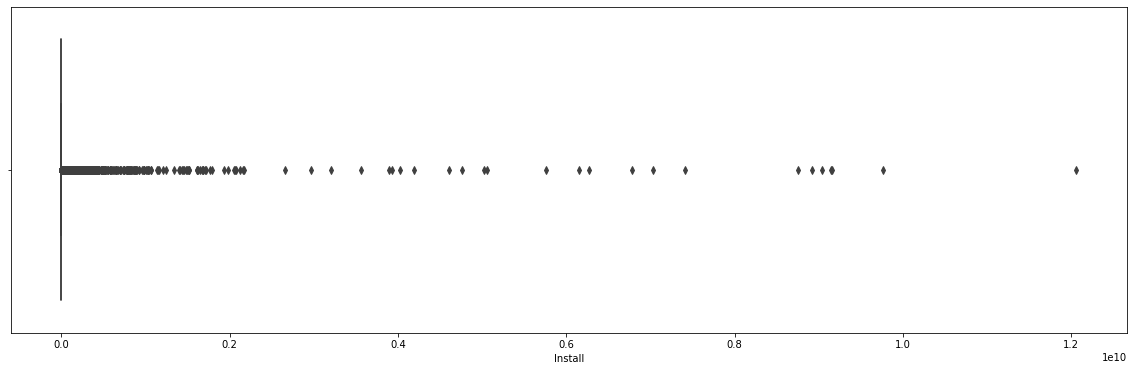

In [ ]:
plt.figure(figsize=(20,6))
sns.boxplot(data=df2, x='Install')

In [ ]:
# Most of highest install apps are from Google
df5 = df2.sort_values('Install',ascending=False)
df5.head()

,index,App Name,App Id,Category,Rating,Rating Count,Install,Free,Price,Size,Developer Id,Released,Last Updated,Content Rating,Ad Supported,In App Purchases,Editors Choice,Scraped Time,Main Category,Released_day,Released_month,Released_year,LU_day,LU_month,LU_year,App Age,Install Per Year
2150954,2155096,Google Play services,com.google.android.gms,Tools,4.20,"35,128,400.00",12057627016,1,0.00,10.95,Google LLC,2012-05-24,2021-06-10,Everyone,0,0,0,2021-06-16,Tools,24,5,2012,10,6,2021,9.07,"1,329,617,480.62"
879610,881403,YouTube,com.google.android.youtube,Video Players & Editors,4.40,"112,440,544.00",9766230924,1,0.00,23.17,Google LLC,2010-10-20,2021-06-16,Teen,1,0,0,2021-06-16,Video Players & Editors,20,10,2010,16,6,2021,10.66,"915,897,812.76"
1769801,1773294,Google,com.google.android.googlequicksearchbox,Tools,4.20,"19,798,962.00",9154248491,1,0.00,10.95,Google LLC,2010-08-12,2021-06-11,Everyone,1,0,0,2021-06-16,Tools,12,8,2010,11,6,2021,10.85,"843,549,785.21"
1729607,1733042,Google Maps - Navigate & Explore,com.google.android.apps.maps,Travel & Local,3.80,"13,576,045.00",9141671889,1,0.00,20.37,Google LLC,2021-06-15,2021-06-15,Everyone,1,0,1,2021-06-16,Travel & Local,15,6,2021,15,6,2021,0.00,"9,141,671,889.00"
1058197,1060335,Google Text-to-Speech,com.google.android.tts,Tools,4.10,"254,700.00",9034404884,1,0.00,10.95,Google LLC,2013-10-10,2021-03-29,Everyone,0,0,0,2021-06-16,Tools,10,10,2013,29,3,2021,7.69,"1,175,180,963.17"


In [ ]:
# Define pre-installed apps: ref - https://en.wikipedia.org/wiki/List_of_most-downloaded_Google_Play_applications
preinstall =  pd.read_excel('/content/gdrive/MyDrive/Colab Notebooks/0. CoderSchool/4. Google_Appstore_project/Play Store Pre-installed apps.xlsx')

In [ ]:
preinstall.head()

,App Name,Category,Pre-installed
0,Google Play Services,tools,yes
1,YouTube,video editor & social media,yes
2,Google Maps,mapping,yes
3,Google,search tool,yes
4,Google Text-to-Speech,accessibility tool,yes


In [ ]:
pinstall_list = list(preinstall['App Name'])

In [ ]:
# Create pattern for filtering pre-installed apps
pinstall_pat = '|'.join(pinstall_list)
pinstall_pat

'Google Play Services|YouTube|Google Maps|Google|Google Text-to-Speech|Gmail|Google Chrome|Facebook|Android Accessibility Suite|Google Drive|Google TV|Google Photos|Hangouts|Currents|Google Play Books|Google Play Games|Samsung Push Service|Android System WebView|Google Street View|Skype|Gboard|Google Duo|Google Cloud Print|Samsung Print Service Plugin|Samsung Internet Browser|Google Calendar|Microsoft Word|Samsung My Files|Samsung Gallery|Samsung One UI Home|Samsung Email|Samsung Voice Recorder|Device Care|Samsung Members|Samsung Health|Samsung Calculator|Messages|Samsung Experience Service|Netflix|Secure Folder|Google Play Services for AR|Samsung Notes'

In [ ]:
# Drop any apps in pre-installed list:
df2 = df2.drop(df2[df2['App Name'].str.contains(pinstall_pat, case=False)].index)

In [ ]:
df2.sort_values('Install',ascending=False).head()

,index,App Name,App Id,Category,Rating,Rating Count,Install,Free,Price,Size,Developer Id,Released,Last Updated,Content Rating,Ad Supported,In App Purchases,Editors Choice,Main Category,Released_day,Released_month,Released_year,LU_day,LU_month,LU_year
384688,385470,WhatsApp Messenger,com.whatsapp,Communication,4.00,"138,557,568.00",6265637751,1,0.00,16.70,WhatsApp LLC,2010-10-18,2021-06-09,Everyone,0,0,1,Communication,18,10,2010,9,6,2021
2091810,2095852,Messenger – Text and Video Chat for Free,com.facebook.orca,Communication,4.00,"78,563,232.00",5054312355,1,0.00,16.70,Facebook,2014-01-30,2021-06-14,Everyone,0,1,1,Communication,30,1,2014,14,6,2021
304213,304824,Instagram,com.instagram.android,Social,3.80,"120,206,192.00",3559871277,1,0.00,18.57,Instagram,2012-04-03,2021-06-14,Teen,1,1,1,Social,3,4,2012,14,6,2021
2306534,2310951,Microsoft OneDrive,com.microsoft.skydrive,Productivity,4.50,"2,276,634.00",2056017889,1,0.00,15.05,Microsoft Corporation,2012-08-28,2021-06-05,Everyone,0,1,0,Productivity,28,8,2012,5,6,2021
1624790,1628043,Android Auto,com.google.android.projection.gearhead,Auto & Vehicles,4.30,"1,824,861.00",1976625745,1,0.00,17.92,Google LLC,2015-03-19,2021-06-15,Teen,0,0,0,Auto & Vehicles,19,3,2015,15,6,2021


## Data Cleaning - User Review

In [ ]:
df_ur.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [ ]:
df_ur.duplicated().sum()

33616

In [ ]:
df_ur[df_ur.duplicated(keep=False)].sort_values(by='Translated_Review')[:10]

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
16025,Block Puzzle,"""Classic"" allows untimed play; game holds posi...",Positive,0.03,0.36
15925,Block Puzzle,"""Classic"" allows untimed play; game holds posi...",Positive,0.03,0.36
15885,Block Puzzle,"""Classic"" allows untimed play; game holds posi...",Positive,0.03,0.36
20401,CNN Breaking US & World News,"""Real"" news MAJORITY public wants hear. While ...",Positive,0.13,0.47
20361,CNN Breaking US & World News,"""Real"" news MAJORITY public wants hear. While ...",Positive,0.13,0.47
20441,CNN Breaking US & World News,"""Real"" news MAJORITY public wants hear. While ...",Positive,0.13,0.47
12305,Banfield Pet Health Tracker,"""View Medical History"" Status Center work. I u...",Negative,-0.07,0.07
12265,Banfield Pet Health Tracker,"""View Medical History"" Status Center work. I u...",Negative,-0.07,0.07
22173,Calorie Counter - MyNetDiary,$40 year want features. Looks though could pay...,Positive,0.39,0.62
22273,Calorie Counter - MyNetDiary,$40 year want features. Looks though could pay...,Positive,0.39,0.62


In [ ]:
#Many rows duplicated in data set user review, so we need to remove all duplicated rows in this dataset
df_ur.drop_duplicates(inplace=True, keep='first')

In [ ]:
df_ur.duplicated().sum()

0

In [ ]:
df_ur.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30679 entries, 0 to 64236
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     30679 non-null  object 
 1   Translated_Review       29692 non-null  object 
 2   Sentiment               29697 non-null  object 
 3   Sentiment_Polarity      29697 non-null  float64
 4   Sentiment_Subjectivity  29697 non-null  float64
dtypes: float64(2), object(3)
memory usage: 1.4+ MB


In [ ]:
df_ur.isna().sum()

App                         0
Translated_Review         987
Sentiment                 982
Sentiment_Polarity        982
Sentiment_Subjectivity    982
dtype: int64

In [ ]:
df_ur[df_ur.Translated_Review.isna()].Sentiment_Polarity.value_counts()

0.00    5
Name: Sentiment_Polarity, dtype: int64

In [ ]:
df_ur[df_ur.Translated_Review.isna()].Sentiment_Subjectivity.value_counts()

0.00    5
Name: Sentiment_Subjectivity, dtype: int64

In [ ]:
# After take a explore in side NA Translated_Review, we see that all Sentiments are also contained NA or 0 value.
# So i decided to drop all that rows
df_ur.drop(index=df_ur[df_ur.Translated_Review.isna()].index , inplace=True)


In [ ]:
df_ur.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29692 entries, 0 to 64230
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     29692 non-null  object 
 1   Translated_Review       29692 non-null  object 
 2   Sentiment               29692 non-null  object 
 3   Sentiment_Polarity      29692 non-null  float64
 4   Sentiment_Subjectivity  29692 non-null  float64
dtypes: float64(2), object(3)
memory usage: 1.4+ MB


## Save cleaned data to file

In [ ]:
df2.head()

,index,App Name,App Id,Category,Rating,Rating Count,Install,Free,Price,Size,Developer Id,Released,Last Updated,Content Rating,Ad Supported,In App Purchases,Editors Choice,Scraped Time,Main Category,Released_day,Released_month,Released_year,LU_day,LU_month,LU_year,App Age,Install Per Year
0,0,Gakondo,com.ishakwe.gakondo,Adventure,0.00,0.00,15,1,0.00,10.00,Jean Confident Irénée NIYIZIBYOSE,2020-02-26,2020-02-26,Everyone,0,0,0,2021-06-15,Game,26,2,2020,26,2,2020,1.30,11.53
1,1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.40,64.00,7662,1,0.00,2.90,Webserveis,2020-05-21,2021-05-06,Everyone,1,0,0,2021-06-15,Tools,21,5,2020,6,5,2021,1.07,"7,170.85"
2,2,Vibook,com.doantiepvien.crm,Productivity,0.00,0.00,58,1,0.00,3.70,Cabin Crew,2019-08-09,2019-08-19,Everyone,0,0,0,2021-06-15,Productivity,9,8,2019,19,8,2019,1.85,31.32
3,3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.00,5.00,19,1,0.00,1.80,Climate Smart Tech2,2018-09-10,2018-10-13,Everyone,1,0,0,2021-06-15,Communication,10,9,2018,13,10,2018,2.76,6.87
4,4,GROW.me,com.horodyski.grower,Tools,0.00,0.00,478,1,0.00,6.20,Rafal Milek-Horodyski,2018-11-12,2018-11-12,Everyone,0,0,0,2021-06-15,Tools,12,11,2018,12,11,2018,2.59,184.43


In [ ]:
# Rearrange columns order:
df2 = df2[['App Id', 'App Name', 'Main Category', 'Category', 'Rating', 'Rating Count', 'Install', 'Free', 'Price', 'Size', 'Developer Id', 'Released', 'Last Updated',
 'Content Rating', 'Ad Supported', 'In App Purchases', 'Editors Choice', 'Released_day', 'Released_month', 'Released_year',
 'LU_day', 'LU_month', 'LU_year','App Age',	'Install Per Year']]

In [ ]:
df2.to_csv('Google_app_cleaned.csv', index=False)
df2.to_csv('GooglePlay_UserRivew_cleaned.csv', index=False)

# C. EXPLORATORY DATA ANALYSIS

## APPLICATION

In [ ]:
dfa = df2[df2['Main Category'] != 'Game']

In [ ]:
dfa.head()

,App Id,App Name,Main Category,Category,Rating,Rating Count,Install,Free,Price,Size,Developer Id,Released,Last Updated,Content Rating,Ad Supported,In App Purchases,Editors Choice,Released_day,Released_month,Released_year,LU_day,LU_month,LU_year,App Age,Install Per Year
1,com.webserveis.batteryinfo,Ampere Battery Info,Tools,Tools,4.40,64.00,7662,1,0.00,2.90,Webserveis,2020-05-21,2021-05-06,Everyone,1,0,0,21,5,2020,6,5,2021,1.07,"7,170.85"
2,com.doantiepvien.crm,Vibook,Productivity,Productivity,0.00,0.00,58,1,0.00,3.70,Cabin Crew,2019-08-09,2019-08-19,Everyone,0,0,0,9,8,2019,19,8,2019,1.85,31.32
3,cst.stJoseph.ug17ucs548,Smart City Trichy Public Service Vehicles 17UC...,Communication,Communication,5.00,5.00,19,1,0.00,1.80,Climate Smart Tech2,2018-09-10,2018-10-13,Everyone,1,0,0,10,9,2018,13,10,2018,2.76,6.87
4,com.horodyski.grower,GROW.me,Tools,Tools,0.00,0.00,478,1,0.00,6.20,Rafal Milek-Horodyski,2018-11-12,2018-11-12,Everyone,0,0,0,12,11,2018,12,11,2018,2.59,184.43
5,com.imocci,IMOCCI,Social,Social,0.00,0.00,89,1,0.00,46.00,Imocci GmbH,2018-12-24,2019-12-20,Teen,0,1,0,24,12,2018,20,12,2019,2.48,35.93


In [ ]:
dfa_sum = dfa.groupby('Category').sum().reset_index()

In [ ]:
dfa_mean = dfa.groupby('Category').mean().reset_index()

In [ ]:
dfa.describe()

,Rating,Rating Count,Install,Free,Price,Size,Ad Supported,In App Purchases,Editors Choice,Released_day,Released_month,Released_year,LU_day,LU_month,LU_year,App Age,Install Per Year
count,"1,929,916.00","1,929,916.00","1,929,916.00","1,929,916.00","1,929,916.00","1,929,916.00","1,929,916.00","1,929,916.00","1,929,916.00","1,929,916.00","1,929,916.00","1,929,916.00","1,929,916.00","1,929,916.00","1,929,916.00","1,929,916.00","1,929,916.00"
mean,2.10,"1,619.48","170,565.01",0.98,0.10,17.14,0.45,0.06,0.00,15.75,6.41,"2,018.21",15.66,6.16,"2,019.51",2.75,"47,259.73"
std,2.11,"157,137.34","8,897,386.09",0.13,2.58,22.10,0.50,0.23,0.01,8.80,3.43,2.12,8.83,3.31,1.54,2.10,"2,042,410.82"
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,"2,009.00",1.00,1.00,"2,009.00",0.00,0.00
25%,0.00,0.00,81.00,1.00,0.00,4.70,0.00,0.00,0.00,8.00,3.00,"2,017.00",8.00,3.00,"2,019.00",1.16,39.96
50%,2.20,5.00,635.00,1.00,0.00,9.30,0.00,0.00,0.00,16.00,6.00,"2,019.00",15.00,6.00,"2,020.00",2.20,278.49
75%,4.30,34.00,"6,128.00",1.00,0.00,21.00,1.00,0.00,0.00,23.00,9.00,"2,020.00",23.00,9.00,"2,021.00",3.88,"2,419.55"
max,5.00,"138,557,568.00","6,265,637,751.00",1.00,400.00,"1,126.40",1.00,1.00,1.00,31.00,12.00,"2,021.00",31.00,12.00,"2,021.00",12.35,"804,115,328.00"


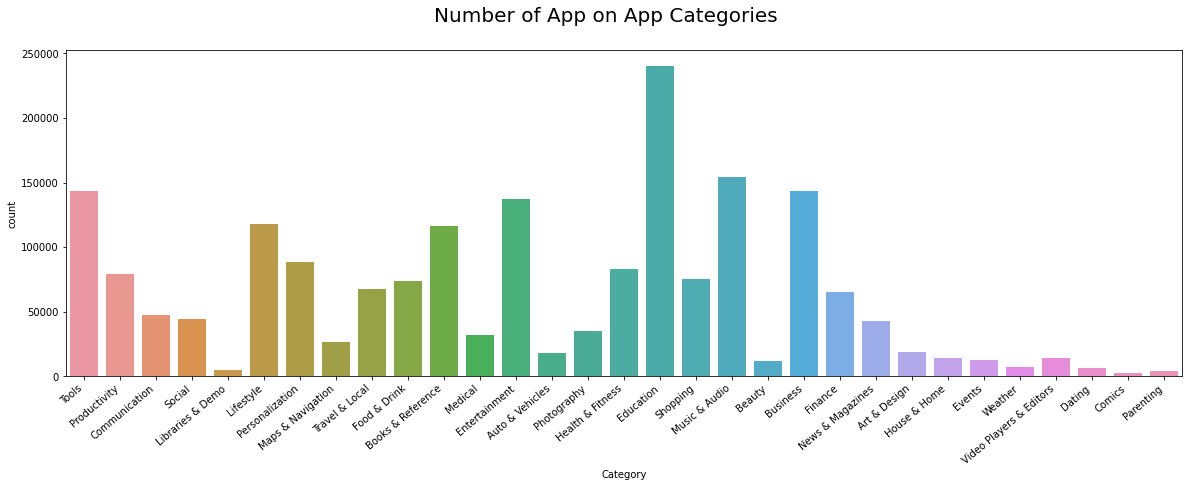

In [ ]:
plt.figure(figsize=(20,6))
plt.suptitle('Number of App on App Categories',fontsize = 20)
ax = sns.countplot(data=dfa, x='Category')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

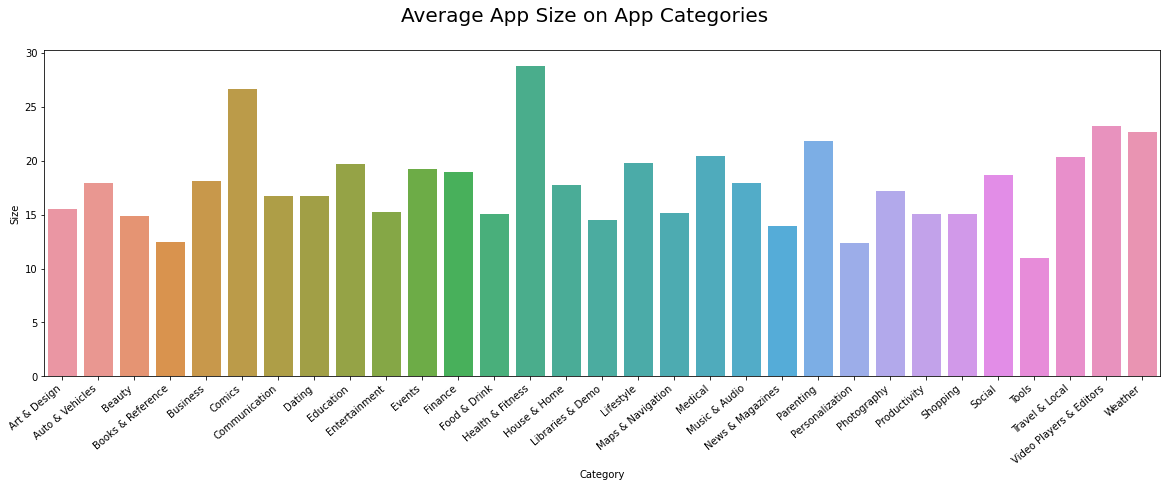

In [ ]:
plt.figure(figsize=(20,6))
plt.suptitle('Average App Size on App Categories',fontsize = 20)
ax = sns.barplot(data=dfa_mean, x='Category', y='Size')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

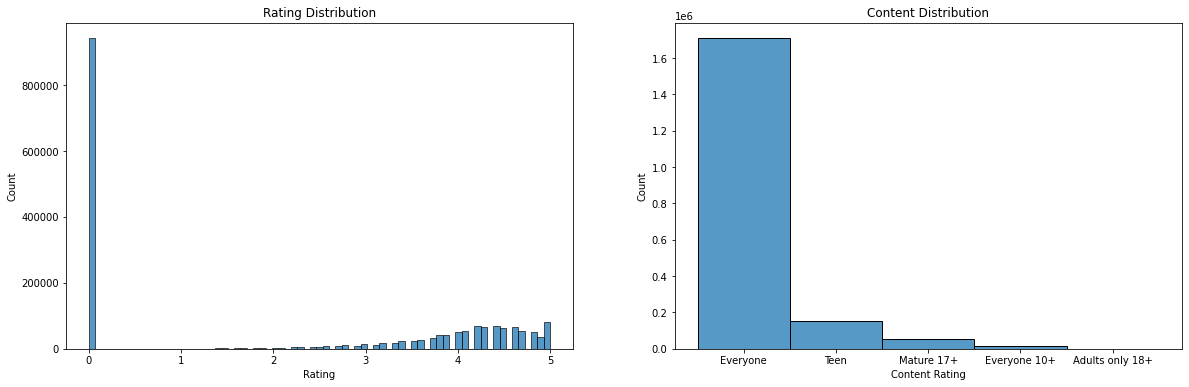

In [ ]:
plt.figure(figsize=(20,6))
plt.subplot(121)
sns.histplot(data=dfa, x='Rating')
plt.title('Rating Distribution')
plt.subplot(122)
sns.histplot(data=dfa, x='Content Rating')
plt.title('Content Distribution')
plt.show()

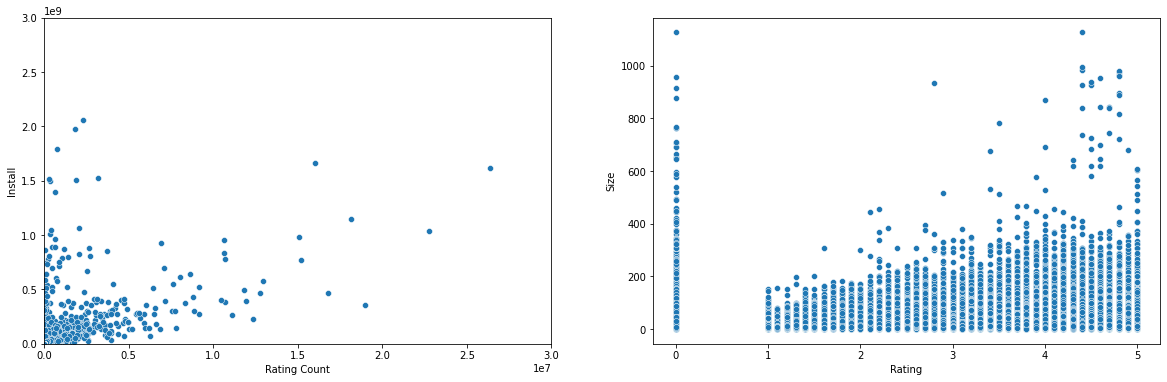

In [ ]:
plt.figure(figsize=(20,6))
plt.subplot(121)
sns.scatterplot(data = dfa, x= 'Rating Count', y='Install')
plt.xlim(0,30000000)
plt.ylim(0,3000000000)
plt.subplot(122)
sns.scatterplot(data = dfa, x= 'Rating', y='Size')
plt.show()

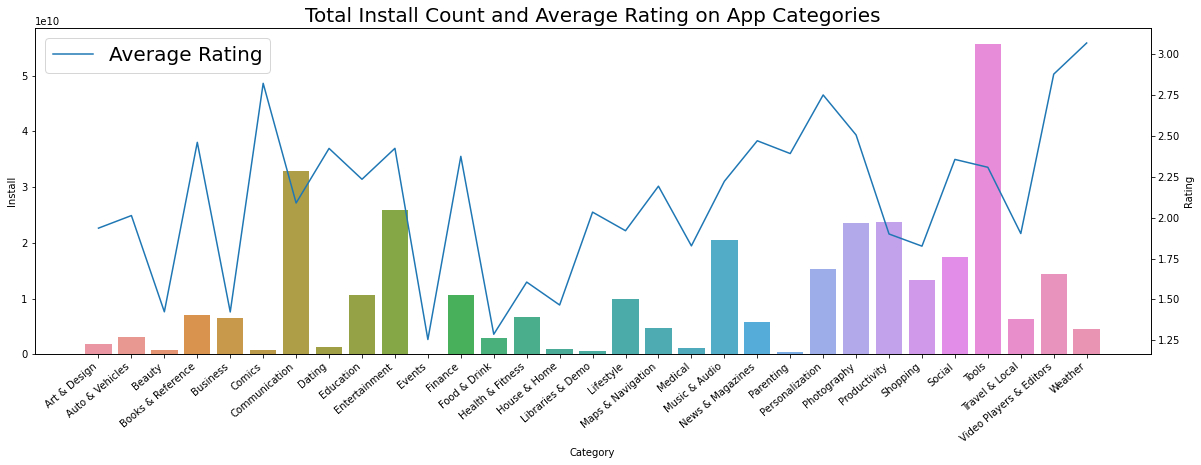

In [ ]:
plt.figure(figsize=(20,6))
plt.title('Total Install Count and Average Rating on App Categories',fontsize = 20)
ax = sns.barplot(data=dfa_sum, x='Category', y='Install')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.twinx()
sns.lineplot(data=dfa_mean, x='Category', y='Rating')
plt.legend(labels=['Average Rating'],fontsize = 20)

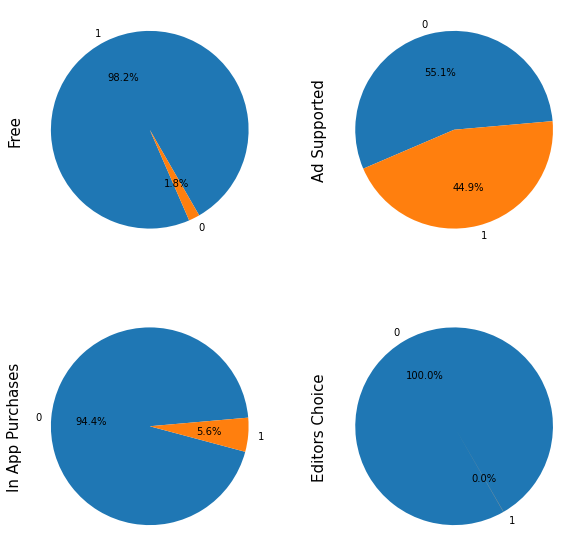

In [ ]:
plt.figure(figsize=(10,10))
plt.rc('axes', labelsize=15, titlesize=20)
plt.subplot(221)
dfa['Free'].value_counts().plot(kind='pie',autopct='%1.1f%%',startangle=300, fontsize=10)
plt.subplot(222)
dfa['Ad Supported'].value_counts().plot(kind='pie',autopct='%1.1f%%',startangle=5, fontsize=10)
plt.subplot(223)
dfa['In App Purchases'].value_counts().plot(kind='pie',autopct='%1.1f%%',startangle=5, fontsize=10)
plt.subplot(224)
dfa['Editors Choice'].value_counts().plot(kind='pie',autopct='%1.1f%%',startangle=300, fontsize=10)
plt.show()

## GAME

In [ ]:
dfg = df2[df2['Main Category'] == 'Game']

In [ ]:
font = {'family' : 'normal',
        'weight' : 2,
        'size'   : 15}
plt.rcParams['axes.facecolor'] = 'white'
plt.rc('font', **font)
plt.rc('axes', labelsize=17, titlesize=20)
dfg['App Age'] = dfg.LU_year - dfg.Released_year

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


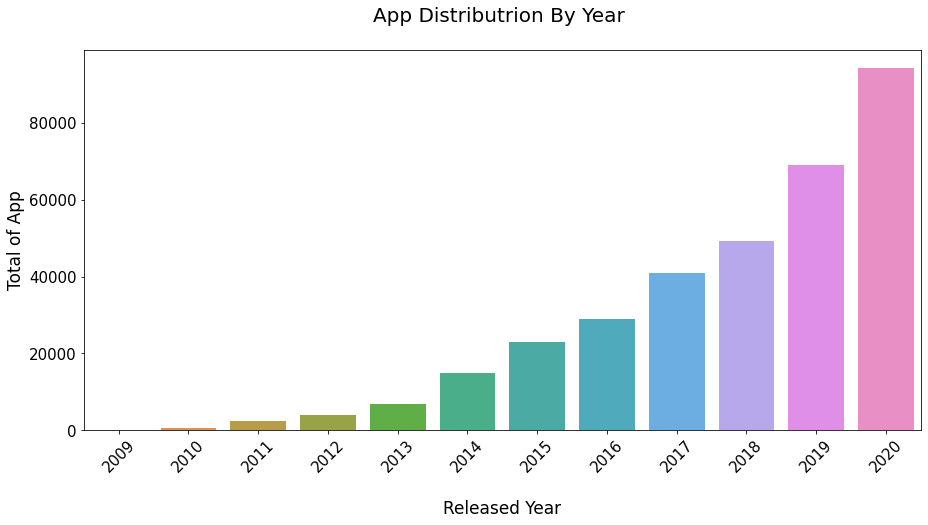

In [ ]:
plt.figure(figsize=(15,7))
sns.countplot(data=dfg[dfg.Released_year != 2021],
             x='Released_year')
plt.xticks(rotation=45)
plt.ylabel('Total of App')
plt.title('App Distributrion By Year \n')
plt.xlabel('\nReleased Year')
plt.show()

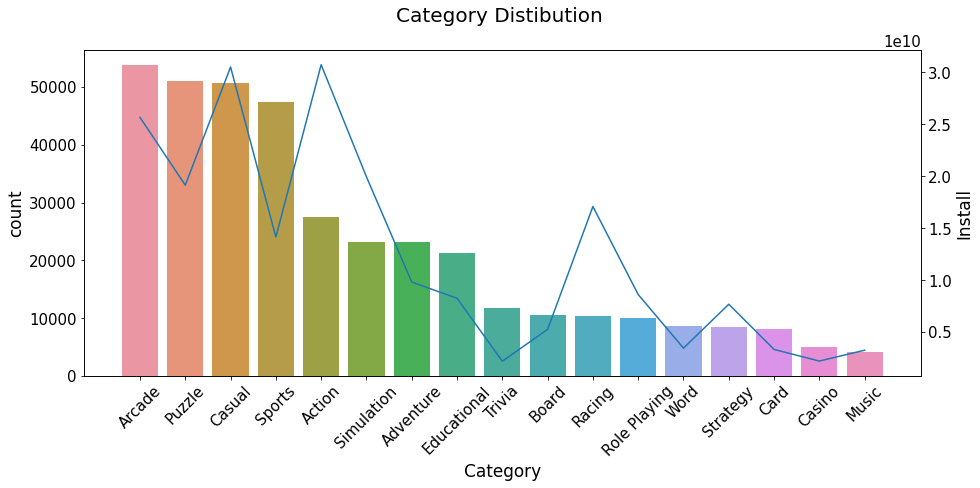

In [ ]:
plt.figure(figsize=(15,6))

sns.countplot(data=dfg,
             x='Category',
             order=dfg.Category.value_counts().index)
plt.xticks(rotation=45)

plt.twinx()


dataplot = dfg.groupby('Category')['Install'].sum().loc[list(dfg.Category.value_counts().index)]
sns.lineplot(data=dataplot.reset_index(),
            x='Category',
            y='Install')
plt.xticks(rotation=45)
plt.title('Category Distibution \n')
plt.show()


`Conclution:`
+ Those categories like 'Racing' and 'Action' are fertile ground for developers, because of high number of install but number of App not too high
+ Top 3 categories thay customer like are Casual, Action, Arcade,...

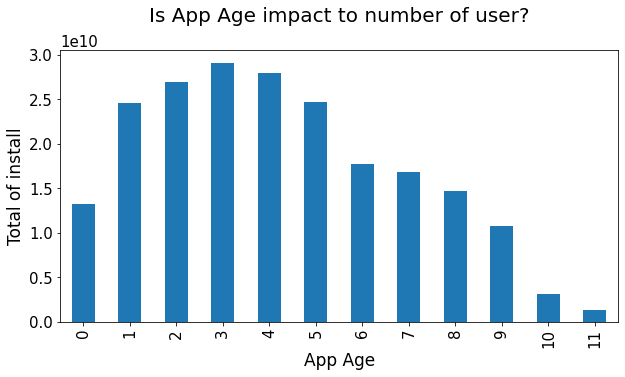

In [ ]:
plt.figure(figsize=(10,5))
dfg.groupby('App Age')['Install'].sum().plot(kind='bar',
                                                    xlabel = 'App Age',
                                                    ylabel = 'Total of install')
plt.title('Is App Age impact to number of user?\n')
plt.show()

`Coclution:` 
+ The age of the game doesn't impact its Installation. So the success of a game doesn't depend on its age but on the quality of the game.

`Coclusion:` 
Size app within 200MB is the best size for customer download

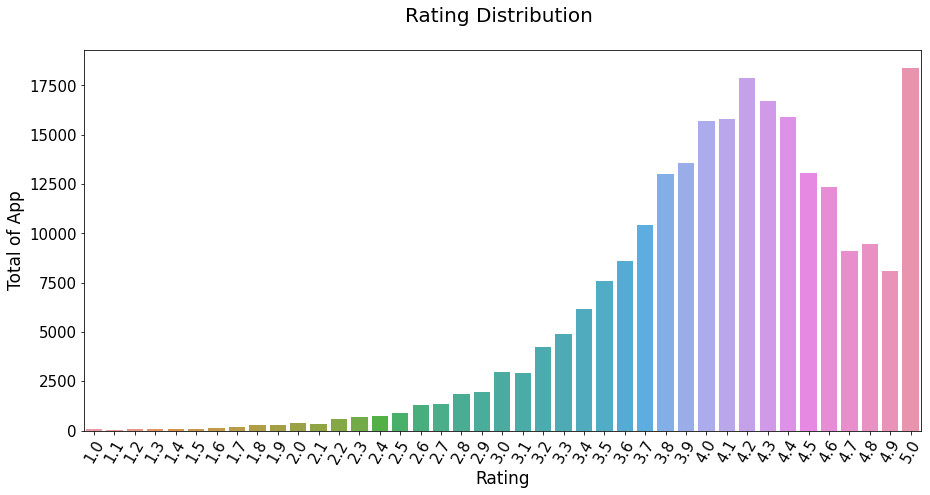

In [ ]:
plt.figure(figsize=(15,7))
sns.countplot(data=dfg[dfg.Rating != 0],
           x='Rating')
plt.xticks(rotation=60)
plt.ylabel('Total of App')
plt.title('Rating Distribution \n')
plt.show()

`Conclusion`:
Customer tend to rate with 4* or 5* in Game

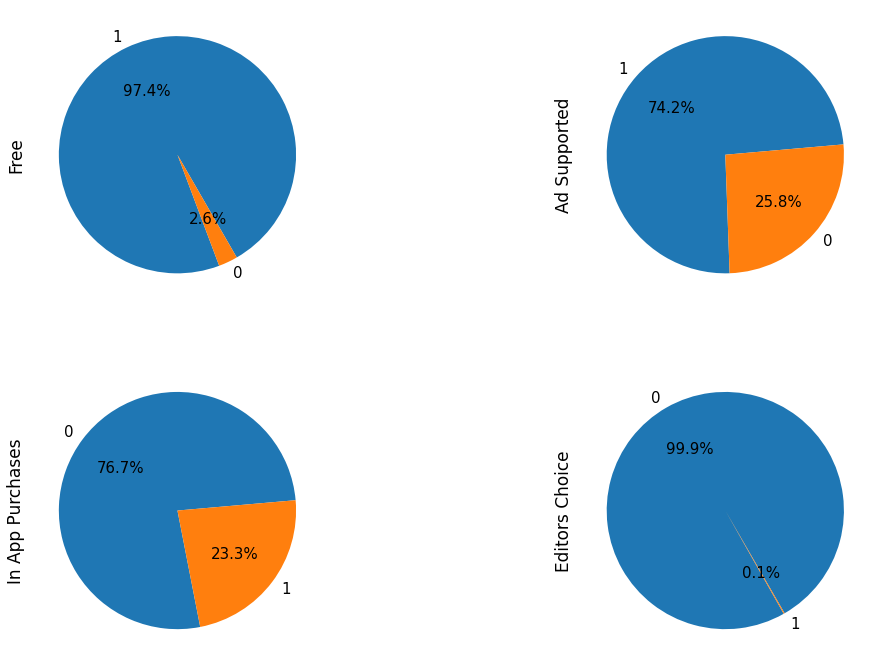

In [ ]:
#Percent of Free\Ad Supported\In App Purchases\Editors Choice in Install qty
plt.figure(figsize=(18,12))
# plt.rc('axes', labelsize=30, titlesize=60)
plt.subplot(221)
dfg['Free'].value_counts().plot(kind='pie',autopct='%1.1f%%',startangle=300, fontsize=15)
plt.subplot(222)
dfg['Ad Supported'].value_counts().plot(kind='pie',autopct='%1.1f%%',startangle=5, fontsize=15)
plt.subplot(223)
dfg['In App Purchases'].value_counts().plot(kind='pie',autopct='%1.1f%%',startangle=5, fontsize=15)
plt.subplot(224)
dfg['Editors Choice'].value_counts().plot(kind='pie',autopct='%1.1f%%',startangle=300, fontsize=15)
plt.show()

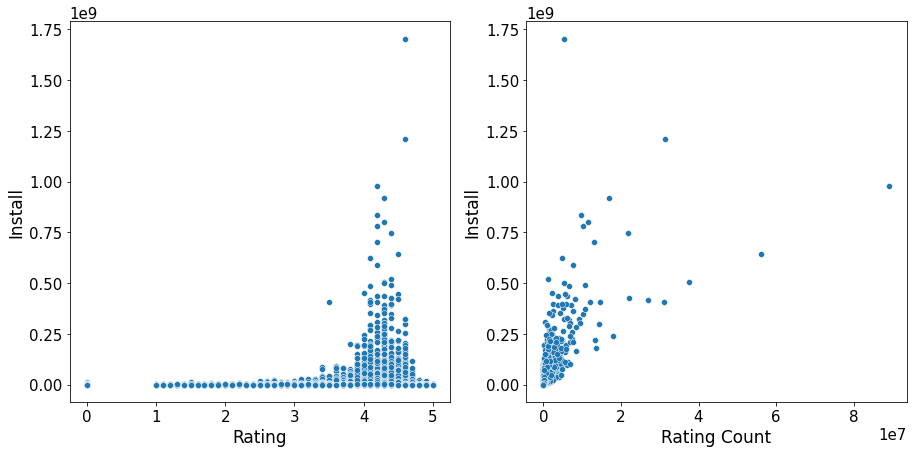

In [ ]:
plt.figure(figsize=(15,7))
# font = {'family' : 'normal',
#         'weight' : 2,
#         'size'   : 10}
plt.rc('font', **font)        
# plt.rc('axes', labelsize=15, titlesize=17)
plt.subplot(121)
sns.scatterplot(x="Rating", y="Install" , sizes=(0, 30), data=dfg);

plt.subplot(122)
sns.scatterplot(data=dfg, x='Rating Count', y='Install')

plt.show()

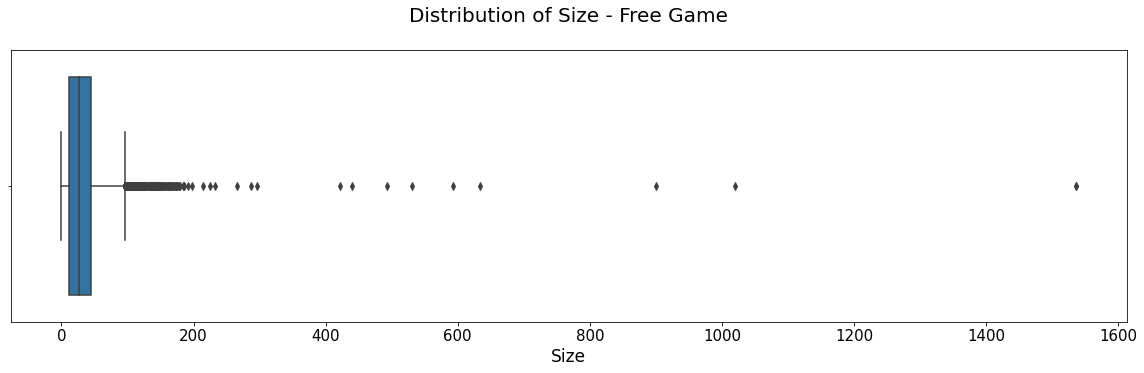

In [ ]:
#the distribution of the size of Game
gamefree =dfg[dfg['Free']==0]
gamepaid =dfg[dfg['Free']!=0]

plt.figure(figsize=(20, 5))
sns.boxplot(data=gamefree,
            x='Size')
plt.title('Distribution of Size - Free Game\n')

plt.show()

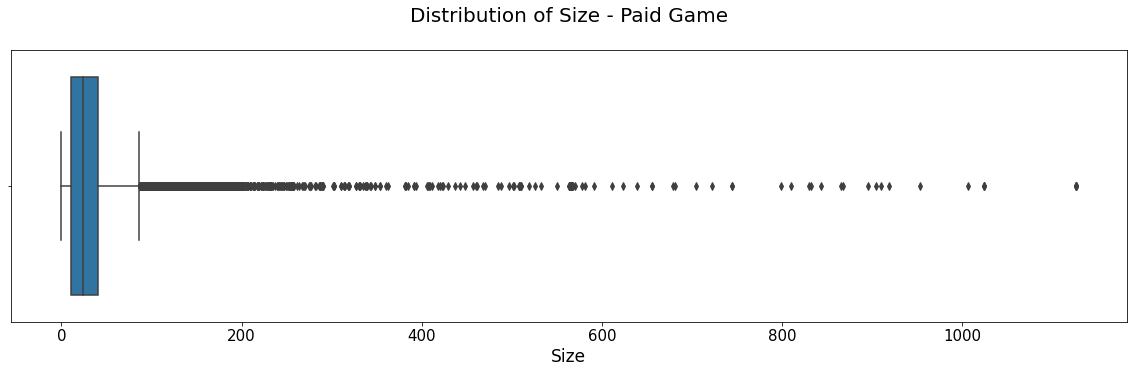

In [ ]:
plt.figure(figsize=(20, 5))
sns.boxplot(data=gamepaid,
            x='Size')
plt.title('Distribution of Size - Paid Game\n')
plt.show()

There are a lot of game under 100MB, in general app are between 5 MB to 30 MB. Paid applications are slightly smaller.

##USER REVIEW

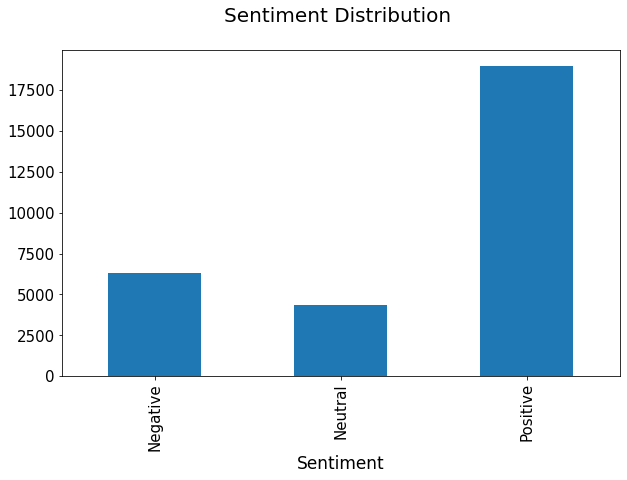

In [ ]:
plt.figure(figsize=(10,6))
df_ur.groupby('Sentiment').App.count().plot(kind='bar')
plt.title('Sentiment Distribution \n')
plt.show()

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
pd.options.display.float_format = "{:,.2f}".format

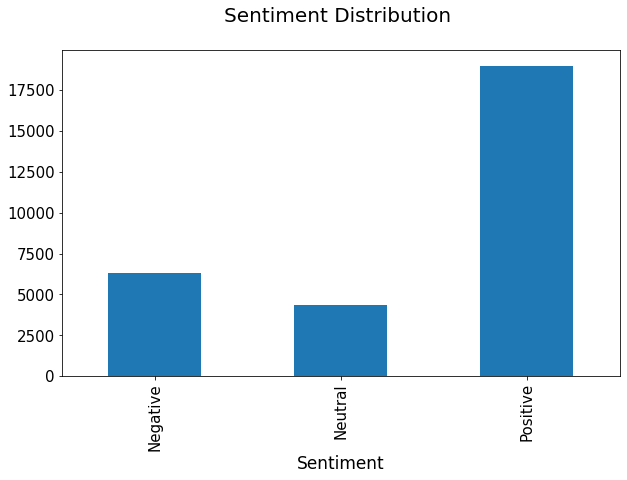

In [ ]:
plt.figure(figsize=(10,6))
df_ur.groupby('Sentiment').App.count().plot(kind='bar')
plt.title('Sentiment Distribution \n')
plt.show()

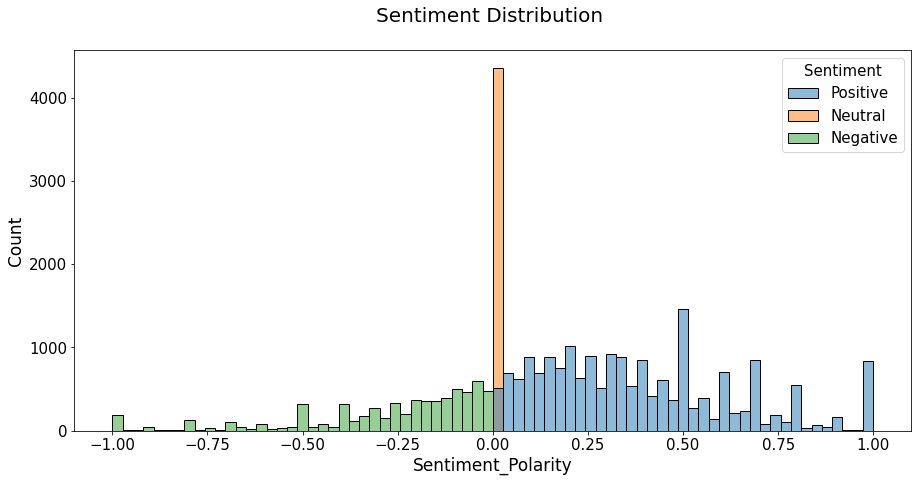

In [ ]:
plt.figure(figsize=(15,7))
plt.title('Sentiment Distribution \n')

sns.histplot(data=df_ur,
             x='Sentiment_Polarity',
             hue='Sentiment')
plt.show()

<Figure size 1800x432 with 0 Axes>

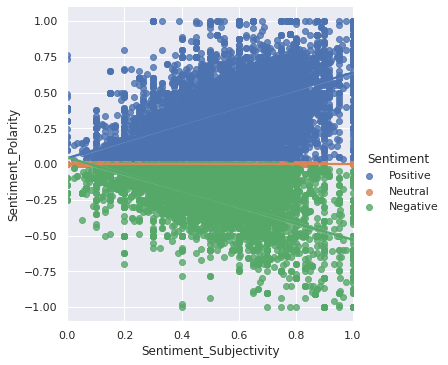

In [ ]:
plt.figure(figsize=(25,6))
# plt.subplot(131)
sns.set_theme(style='darkgrid')
sns.lmplot(data=df_ur, x='Sentiment_Subjectivity', y ='Sentiment_Polarity', hue='Sentiment')
plt.show()

# D. REPORT

## Choosing between App or Game:

In [ ]:
app_stat = [dfa['Install'].sum()/dfa['App Id'].count(),dfa['Rating'].median(),dfa['Ad Supported'].mean(),1-dfa['Free'].mean()]
app_stat

[170565.00959160918, 2.2, 0.4494454680929118, 0.01804068156334271]

In [ ]:
game_stat = [dfg['Install'].sum()/dfg['App Id'].count(),dfg['Rating'].median(),dfg['Ad Supported'].mean(),1-dfg['Free'].mean()]
game_stat

[563135.6001715522, 3.7, 0.7419098765037454, 0.026129740327547446]

In [ ]:
gameapp_compare = pd.DataFrame(data = {'Criteria': ['Install/App Count Ratio','Median Rating','Ad Supported Rate', 'Paid'], 'Game': game_stat, 'Application':app_stat})
gameapp_compare

,Criteria,Game,Application
0,Install/App Count Ratio,"563,135.60","170,565.01"
1,Median Rating,3.70,2.20
2,Ad Supported Rate,0.74,0.45
3,Paid,0.03,0.02


In [ ]:
T_gameapp = gameapp_compare.set_index('Criteria').T

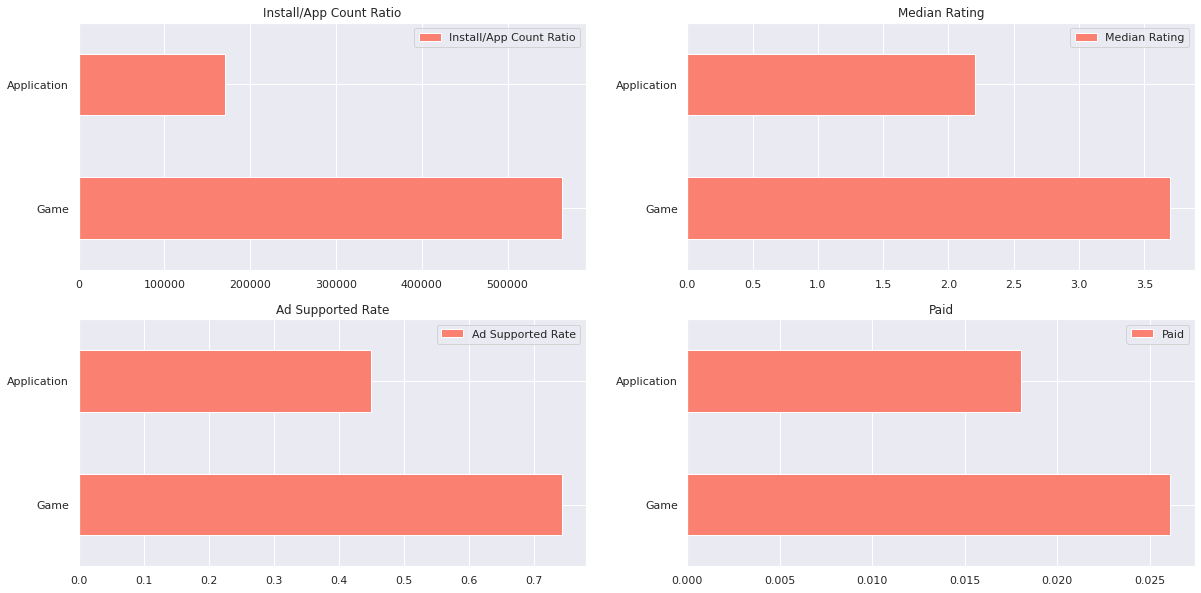

In [ ]:
fig, ax = plt.subplots(2,2, figsize=(20,10))
T_gameapp.plot(kind='barh', y='Install/App Count Ratio', ax=ax[0][0], color = 'salmon')
ax[0][0].set_title('Install/App Count Ratio')
T_gameapp.plot(kind='barh', y='Median Rating', ax=ax[0][1], color = 'salmon')
ax[0][1].set_title('Median Rating')
T_gameapp.plot(kind='barh', y='Ad Supported Rate', ax=ax[1][0], color = 'salmon')
ax[1][0].set_title('Ad Supported Rate')
T_gameapp.plot(kind='barh', y='Paid', ax=ax[1][1], color = 'salmon')
ax[1][1].set_title('Paid')
plt.show()

All the criteria are better when developing a Game compared to Application

In [ ]:
dfg

,App Id,App Name,Main Category,Category,Rating,Rating Count,Install,Free,Price,Size,Developer Id,Released,Last Updated,Content Rating,Ad Supported,In App Purchases,Editors Choice,Released_day,Released_month,Released_year,LU_day,LU_month,LU_year,App Age,Install Per Year
0,com.ishakwe.gakondo,Gakondo,Game,Adventure,0.00,0.00,15,1,0.00,10.00,Jean Confident Irénée NIYIZIBYOSE,2020-02-26,2020-02-26,Everyone,0,0,0,26,2,2020,26,2,2020,0,11.53
10,com.MrScratchEnterprises.CarDogeGame,Dodge The Cars!,Game,Racing,4.90,55.00,329,1,0.00,51.00,MrScratch,2020-07-30,2020-07-30,Everyone,0,0,0,30,7,2020,30,7,2020,0,329.00
22,com.mailbeegames.casual.brain.line.block.puzzl...,Block Fill: Puzzle Game,Game,Puzzle,4.40,211.00,15471,1,0.00,16.00,MailBee Games,2020-03-13,2020-05-11,Everyone,1,1,0,13,3,2020,11,5,2020,0,"12,302.65"
25,com.mitochondriastudios.stickyball,Sticky Ball,Game,Arcade,4.60,11.00,152,1,0.00,25.00,Mitochondria Studios,2018-03-05,2018-03-26,Everyone,1,1,0,5,3,2018,26,3,2018,0,46.31
26,jp.ga_software.cubicrunner,CUBIC RUNNER,Game,Arcade,0.00,0.00,1068,1,0.00,16.00,GA software,2015-04-01,2015-04-16,Everyone,1,1,0,1,4,2015,16,4,2015,0,171.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2308492,com.braincolor.braincolor,Brain Color - Colorful Puzzles,Game,Puzzle,0.00,0.00,25,1,0.00,3.60,Alexis Leblond,2018-03-11,2018-05-01,Everyone,1,0,0,11,3,2018,1,5,2018,0,7.65
2308509,jp.abt.lopnur.gearratiocalc,Gear Ratio Calculator,Game,Sports,0.00,0.00,201,0,2.49,0.97,ABT,2012-06-19,2012-11-09,Everyone,0,0,0,19,6,2012,9,11,2012,0,22.34
2308514,com.upopa.hopeless2,Hopeless 2: Cave Escape,Game,Action,4.30,"103,466.00",7274660,1,0.00,37.00,Upopa Games,2015-10-29,2017-03-06,Teen,1,1,0,29,10,2015,6,3,2017,2,"1,290,836.61"
2308521,com.rxsj.ssjj,大俠客—熱血歸來,Game,Role Playing,4.30,"16,775.00",337109,1,0.00,77.00,ALICE GAME,2021-06-01,2021-06-01,Teen,0,0,0,1,6,2021,1,6,2021,0,"337,109.00"
